# Introduction

This notebook shows how to use the **new neural network models in Sci-Kit Learn v0.18**. We will be using the **image recognition MNIST dataset.**

In [1]:
# Loading packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# Note that in v0.18, cross validation packages are bundled into a new module called 'model_selection'
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_digits
from sklearn import metrics

from sklearn.model_selection import KFold

In [2]:
mnist = load_digits()

### Let's take a look at one of the images, its classification, and the shape of the image.

Shape of image: (8L, 8L)
Digit class: 6


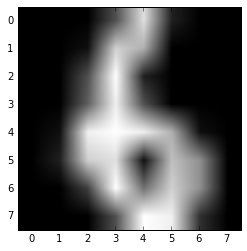

In [3]:
# shape of each image
print 'Shape of image:',mnist.images[0].shape
plt.imshow(mnist.images[34],cmap=plt.get_cmap('gray'))
print 'Digit class:',mnist.target[34]

### To classify images, we need to reshape the image from a 2D array to a 1D array. Essentially flattening each image, with each pixel as a 'feature'.

In [4]:
# To learn image classifications, we need to reshape the image's 2D array into a 1D array, 
# with each pixel as a feature
n_samples = len(mnist.images)
features = mnist.images.reshape(n_samples,-1)
targets = mnist.target
features.shape

(1797L, 64L)

### Setting up the train-test-split and the cross validation strategy.

In [63]:
# Set up the train test split and cv data sets
x_train,x_test,y_train,y_test = train_test_split(features,targets,test_size=0.33)
kf = KFold(n_splits=10)

### Now we are ready to train the model with the training data! I've played around with the hyper-parameters a bit, and in this demo I want to show how to force the neural network to run until the max_iter value. In general though, you would want the training to stop once a tolerance value is reached. 

Best loss: 8.91714680287e-05


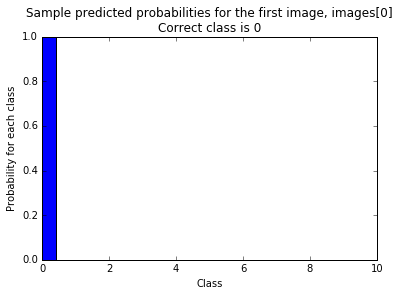

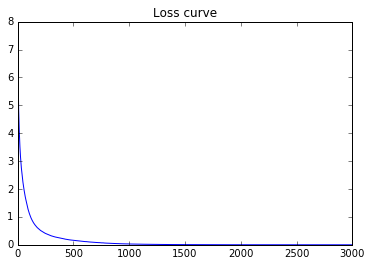

In [75]:
# Set tolerance to a negative value to force classifier to reach max_iter, downside is that it takes a while to run
model = MLPClassifier(hidden_layer_sizes=(30,30),
                      max_iter=3000,
                      activation='relu',
                      learning_rate='adaptive',
                      learning_rate_init=0.0001,
                      tol=-1.0)

model.fit(x_train,y_train)

print 'Best loss:',model.best_loss_

plt.figure()
plt.title('Sample predicted probabilities for the first image, images[0]\nCorrect class is 0')
plt.xlabel('Class')
plt.ylabel('Probability for each class')
plt.bar(left=range(10),height=model.predict_proba(mnist.images[0].reshape(1,-1)).flatten(),align='center')
plt.xlim(xmin=0,xmax=10)

plt.figure()
plt.title('Loss curve')
plt.plot(model.loss_curve_)

### The model predicted the correct class for the first image, mnist.images[0], which is a 0. 
### Now let's see how the model performs in cross validation. Since we are forcing the model to iterate to max_iter, k-fold cross validation takes a couple minutes to run!

In [79]:
# Let's see how the model performs in cross validation
# Warning: Takes a couple minutes to run!
pred = cross_val_predict(model,x_train,y_train,cv=kf)

print metrics.classification_report(y_train,pred)
print 'Accuracy:',metrics.accuracy_score(y_train,pred)

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       120
          1       0.95      0.99      0.97       122
          2       0.98      0.99      0.99       120
          3       0.97      0.97      0.97       118
          4       0.98      0.98      0.98       122
          5       0.97      0.97      0.97       116
          6       0.98      1.00      0.99       111
          7       1.00      0.98      0.99       131
          8       0.97      0.92      0.94       119
          9       0.97      0.97      0.97       124

avg / total       0.98      0.98      0.98      1203

Accuracy: 0.975893599335


### Cross validation score (10 folds) seems to perform well! Let's train the final model on the complete training dataset and see how it performs with the test set.

In [78]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print metrics.classification_report(y_test,pred)
print 'Accuracy score:',metrics.accuracy_score(y_test,pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        58
          1       0.94      1.00      0.97        60
          2       1.00      1.00      1.00        57
          3       0.94      0.98      0.96        65
          4       1.00      0.98      0.99        59
          5       1.00      0.97      0.98        66
          6       1.00      0.99      0.99        70
          7       0.96      0.96      0.96        48
          8       0.96      0.93      0.94        55
          9       0.95      0.93      0.94        56

avg / total       0.98      0.97      0.97       594

Accuracy score: 0.974747474747


### The accuracy scores for both cross validation and the test set are in line with each other at ~97% accuracy. Let's compare the neural network performance with a Random Forest!

In [89]:
model = RandomForestClassifier(n_estimators=500,oob_score=True)
model.fit(x_train,y_train)

pred = model.predict(x_test)

print metrics.classification_report(y_test,pred)
print 'Accuracy:',metrics.accuracy_score(y_test,pred)
print 'OOB score:',model.oob_score_

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        58
          1       0.95      1.00      0.98        60
          2       1.00      0.96      0.98        57
          3       0.95      0.94      0.95        65
          4       1.00      0.97      0.98        59
          5       0.98      0.97      0.98        66
          6       1.00      1.00      1.00        70
          7       0.94      0.98      0.96        48
          8       0.95      0.95      0.95        55
          9       0.96      0.96      0.96        56

avg / total       0.97      0.97      0.97       594

Accuracy: 0.973063973064
OOB score: 0.969243557772


# Conclusion:
Random Forest classifier performed just as well as the neural network, and it ran faster than the neural network. This is probably due to my forcing the neural network to go through all iterations to max_iter. If we spend some time fine tuning the neural network hyper parameters, such as number of neurons per hidden layer, number of hidden layers, or activation function, the model can probably yield faster and better results!